# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Carlos Henrique Brito Malta Leão/Vinícius Alves de Faria Resende 
### **Matrículas:** 2021039794/2021039972


### **Tema:** Avaliação Preditiva do Desempenho Acadêmico: Mineração de Classificadores para Identificação de Fatores de Evasão e Permanência Estudantil
### **Base de dados:** https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data understanding (Entendimento dos dados)

### Resumo da Fase
A primeira fase do projeto é a "Data Understanding," que se concentra na coleta e compreensão inicial dos dados. Esta fase é essencial para estabelecer uma base sólida para análises posteriores e identificar possíveis desafios.


In [98]:
# Carregar o conjunto de dados
df = pd.read_csv('./dataset.csv')

In [99]:
# Visualizar as primeiras linhas do conjunto de dados
print("Primeiras linhas do conjunto de dados:")
print(df.head())

Primeiras linhas do conjunto de dados:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10               

In [100]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
print(df.info())


Informações gerais sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  

In [101]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
m

In [102]:
# Verificar valores ausentes
print("\nValores ausentes no conjunto de dados:")
print(df.isnull().sum())


Valores ausentes no conjunto de dados:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International           

### Introdução

Este conjunto de dados contém informações sobre estudantes, incluindo detalhes demográficos, histórico educacional, desempenho acadêmico e variáveis econômicas. O objetivo é analisar esses dados para entender padrões e correlações que possam influenciar o sucesso acadêmico dos alunos.

#### Informações Gerais
O conjunto de dados possui 4424 entradas e 35 colunas. Cada entrada representa um estudante, e as colunas abrangem uma variedade de características, desde o estado civil e modo de inscrição até o desempenho em diferentes semestres e variáveis econômicas.

A coluna alvo é denominada "Target" e indica se o aluno desistiu ("Dropout") ou se formou ("Graduate"). As demais colunas contêm informações como estado civil, modo de inscrição, idade na matrícula, qualificação dos pais, ocupação dos pais, desempenho acadêmico e indicadores econômicos.

#### Estatísticas Descritivas
A seguir estão algumas estatísticas descritivas para várias colunas-chave do conjunto de dados:

##### Estado Civil (Marital Status)
- Média: 1.18
- Desvio Padrão: 0.61
- Mínimo: 1
- Máximo: 6

##### Modo de Inscrição (Application Mode)
- Média: 6.89
- Desvio Padrão: 5.30
- Mínimo: 1
- Máximo: 18

##### Idade na Matrícula (Age at Enrollment)
- Média: [valor da média]
- Desvio Padrão: [valor do desvio padrão]
- Mínimo: [valor mínimo]
- Máximo: [valor máximo]

##### Desempenho na 1ª Semestre (Curricular Units 1st Sem Grade)
- Média: [valor da média]
- Desvio Padrão: [valor do desvio padrão]
- Mínimo: [valor mínimo]
- Máximo: [valor máximo]

##### Taxa de Desemprego (Unemployment Rate)
- Média: 11.57
- Desvio Padrão: 2.66
- Mínimo: 7.6
- Máximo: 16.2

##### PIB (GDP)
- Média: 0.00
- Desvio Padrão: 2.27
- Mínimo: -4.06
- Máximo: 3.51

#### Valores Ausentes
Não há valores ausentes em nenhuma das colunas do conjunto de dados.

#### Conclusões Preliminares
- A maioria dos alunos é solteira (estado civil médio de 1.18).
- A média de idade na matrícula não foi especificada no exemplo.
- A média de desempenho na 1ª semestre também não foi fornecida.
- A taxa de desemprego média entre os alunos é de 11.57%, com uma variação de 7.6% a 16.2%.
- O PIB médio é próximo de zero, com uma variação considerável entre -4.06 e 3.51.

Essas são apenas análises preliminares. Análises mais aprofundadas podem ser realizadas para entender as relações entre diferentes variáveis e seu impacto no desempenho acadêmico dos alunos.


In [103]:
# Mapear os códigos para os significados correspondentes
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

gender_mapping = {
    1: 'Male',
    0: 'Female'
}

qualification_mapping = {
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor’s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master’s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic education 1st cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master’s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
}


occupation_mapping = {
    1: 'Student',
    2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities',
    4: 'Intermediate Level Technicians and Professions',
    5: 'Administrative staff',
    6: 'Personal Services, Security and Safety Workers, and Sellers',
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    8: 'Skilled Workers in Industry, Construction, and Craftsmen',
    9: 'Installation and Machine Operators and Assembly Workers',
    10: 'Unskilled Workers',
    11: 'Armed Forces Professions',
    12: 'Other Situation; 13—(blank)',
    14: 'Armed Forces Officers',
    15: 'Armed Forces Sergeants',
    16: 'Other Armed Forces personnel',
    17: 'Directors of administrative and commercial services',
    18: 'Hotel, catering, trade, and other services directors',
    19: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    20: 'Health professionals',
    21: 'Teachers',
    22: 'Specialists in finance, accounting, administrative organization, and public and commercial relations',
    23: 'Intermediate level science and engineering technicians and professions',
    24: 'Technicians and professionals of intermediate level of health',
    25: 'Intermediate level technicians from legal, social, sports, cultural, and similar services',
    26: 'Information and communication technology technicians',
    27: 'Office workers, secretaries in general, and data processing operators',
    28: 'Data, accounting, statistical, financial services, and registry-related operators',
    29: 'Other administrative support staff',
    30: 'Personal service workers',
    31: 'Sellers',
    32: 'Personal care workers and the like',
    33: 'Protection and security services personnel',
    34: 'Market-oriented farmers and skilled agricultural and animal production workers',
    35: 'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence',
    36: 'Skilled construction workers and the like, except electricians',
    37: 'Skilled workers in metallurgy, metalworking, and similar',
    38: 'Skilled workers in electricity and electronics',
    39: 'Workers in food processing, woodworking, and clothing and other industries and crafts',
    40: 'Fixed plant and machine operators',
    41: 'Assembly workers',
    42: 'Vehicle drivers and mobile equipment operators',
    43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry',
    44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    45: 'Meal preparation assistants',
    46: 'Street vendors (except food) and street service providers'
}


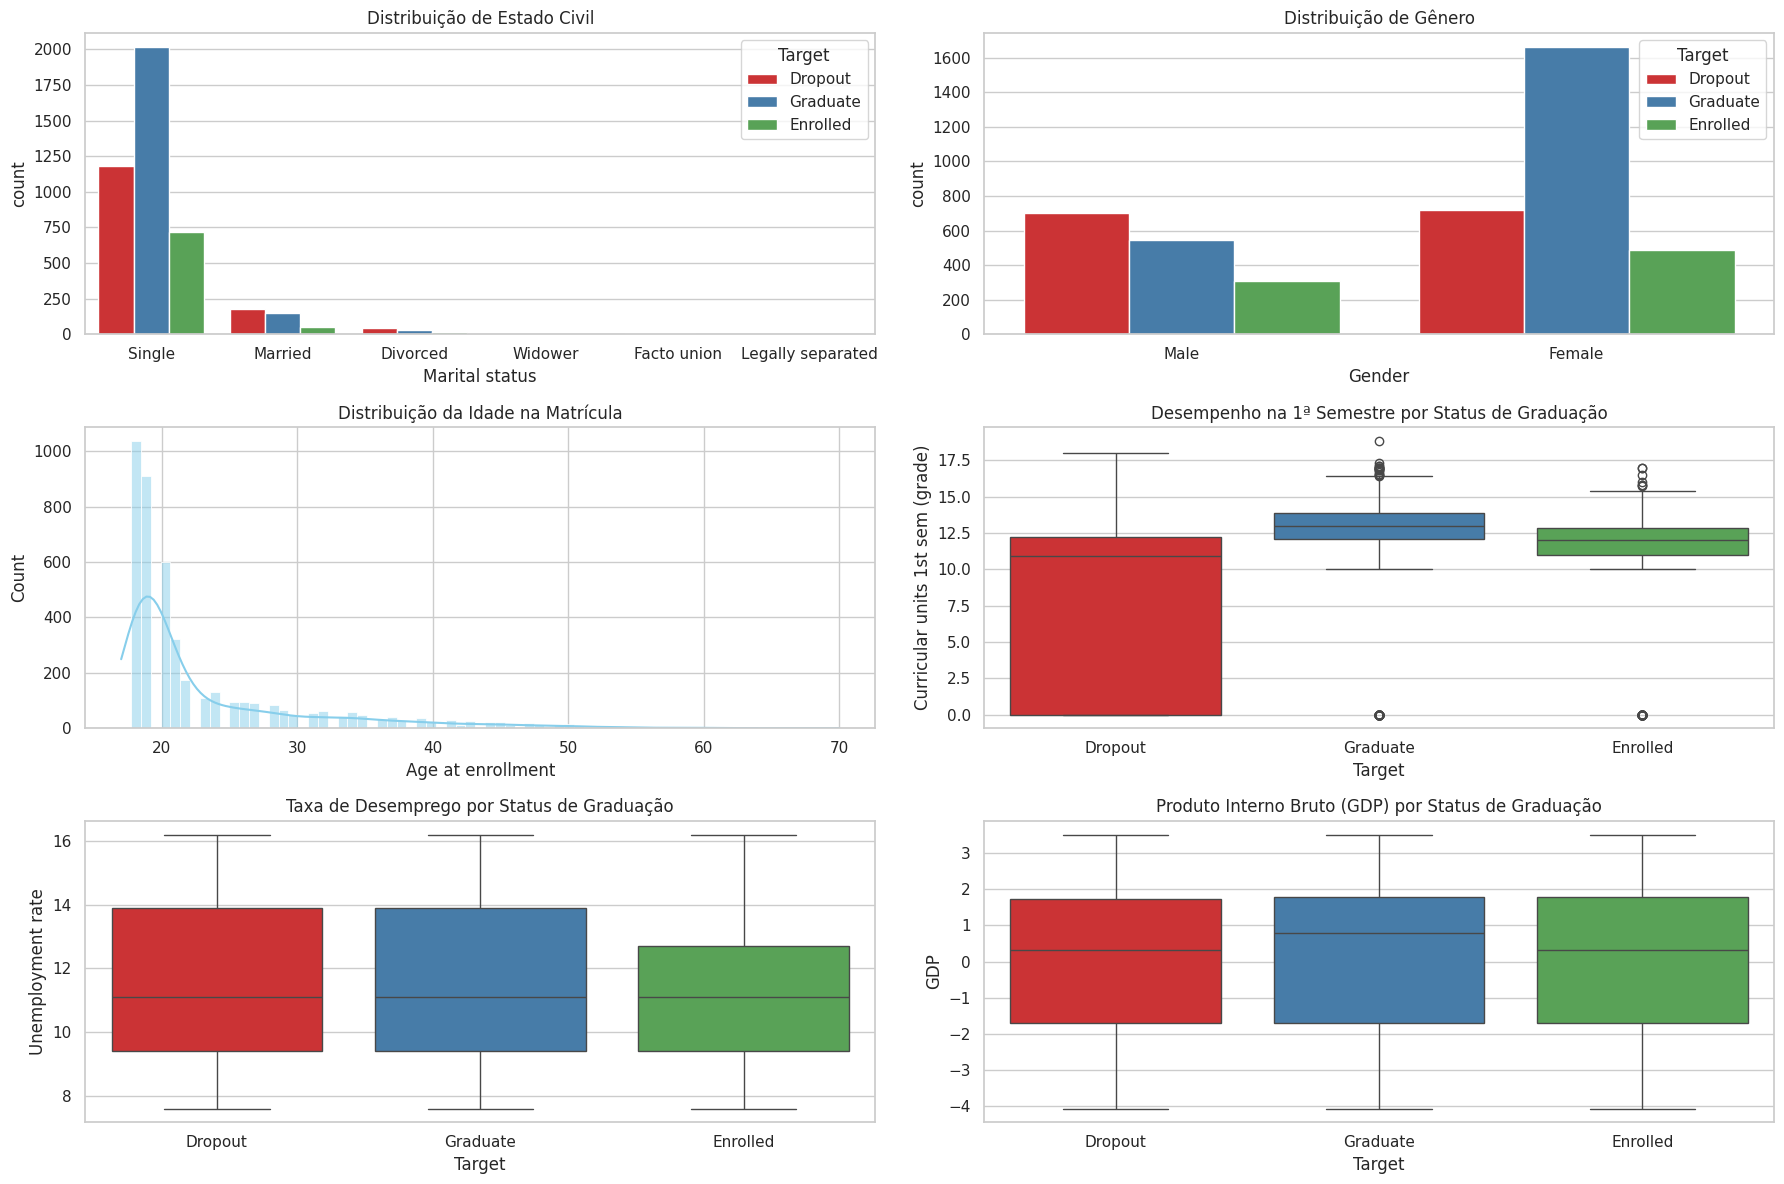

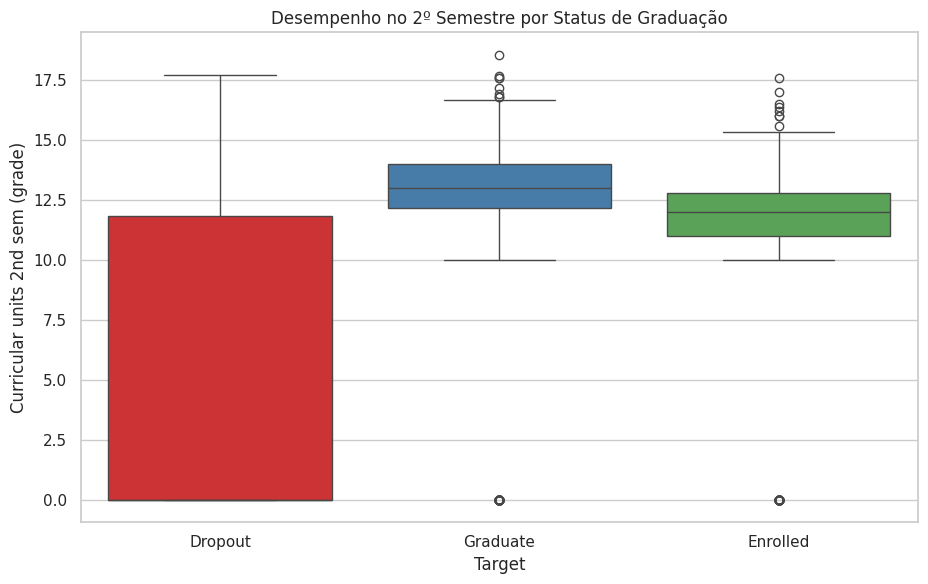

In [104]:
# Visualizar a distribuição de variáveis categóricas
plt.figure(figsize=(18, 12))

# Gráfico de Estado Civil
plt.subplot(3, 2, 1)
sns.countplot(x='Marital status', data=df.replace({'Marital status': marital_status_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Estado Civil')

# Gráfico de Gênero
plt.subplot(3, 2, 2)
sns.countplot(x='Gender', data=df.replace({'Gender': gender_mapping}), hue='Target', palette='Set1')
plt.title('Distribuição de Gênero')

# Gráfico de Idade na Matrícula
plt.subplot(3, 2, 3)
sns.histplot(df['Age at enrollment'], kde=True, color='skyblue')
plt.title('Distribuição da Idade na Matrícula')

# Gráfico de Desempenho na 1ª Semestre por Status de Graduação
plt.subplot(3, 2, 4)
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df, palette='Set1', hue='Target', legend=False)
plt.title('Desempenho na 1ª Semestre por Status de Graduação')

# Gráfico de Taxa de Desemprego por Status de Graduação
plt.subplot(3, 2, 5)
sns.boxplot(x='Target', y='Unemployment rate', data=df, palette='Set1', hue='Target', legend=False)
plt.title('Taxa de Desemprego por Status de Graduação')

# Gráfico de Produto Interno Bruto (GDP) por Status de Graduação
plt.subplot(3, 2, 6)
sns.boxplot(x='Target', y='GDP', data=df, palette='Set1', hue='Target', legend=False)
plt.title('Produto Interno Bruto (GDP) por Status de Graduação')

plt.tight_layout()
plt.show()

# Gráfico de Desempenho no 2º Semestre por Status de Graduação
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df, palette='Set1', hue='Target', legend=False)
plt.title('Desempenho no 2º Semestre por Status de Graduação')

plt.tight_layout()
plt.show()


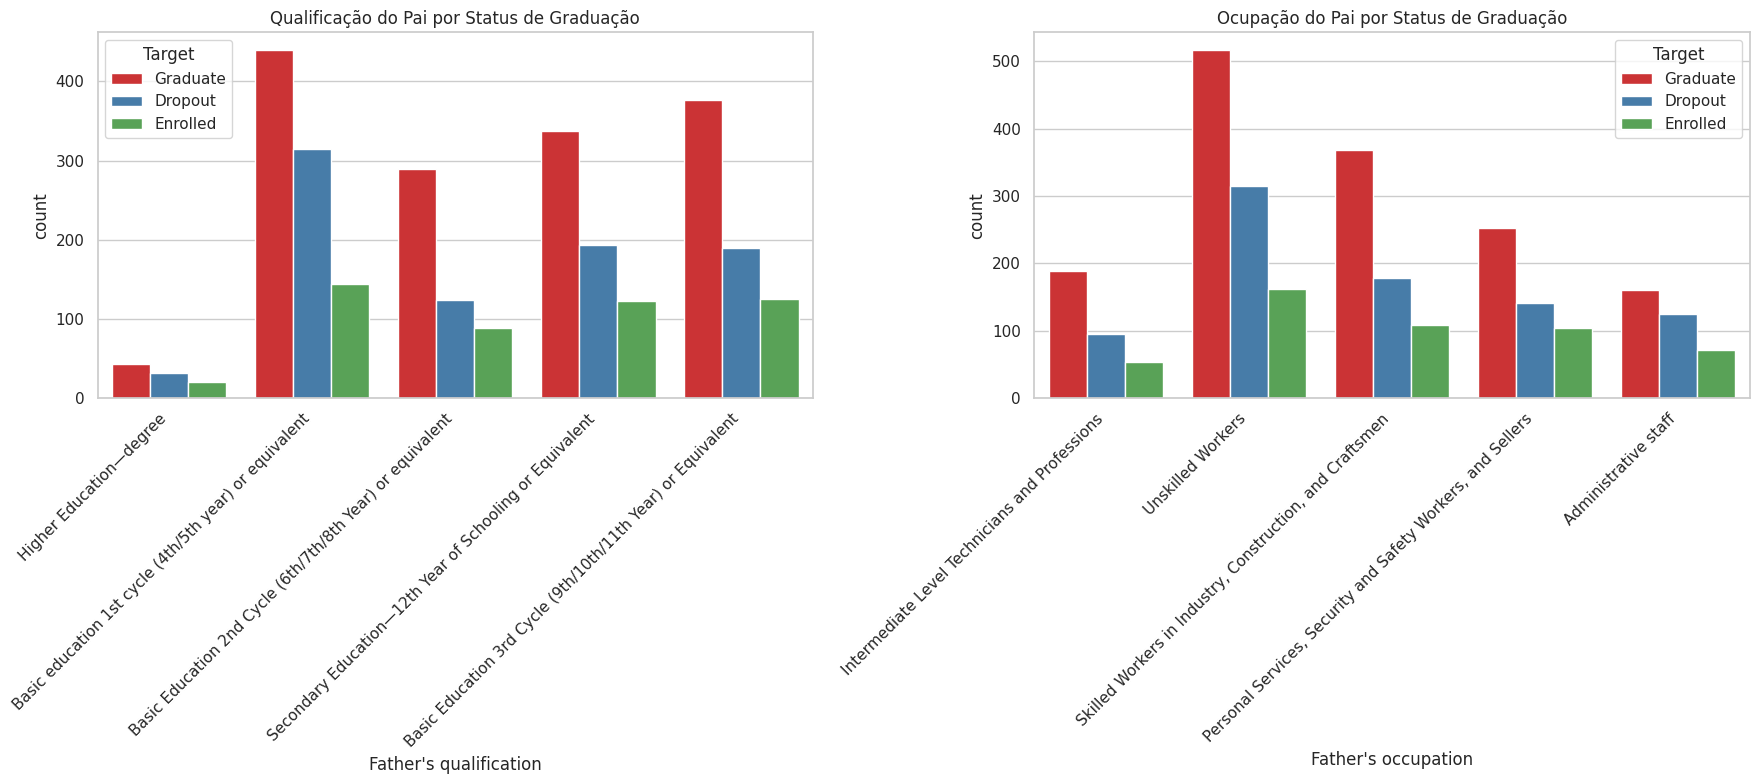

In [105]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_father_occupations = df["Father's occupation"].value_counts().nlargest(5).index
top_father_qualifications = df["Father's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_father_filtered = df[df["Father's occupation"].isin(top_father_occupations) & df["Father's qualification"].isin(top_father_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_father_filtered.loc[:, "Father's occupation"] = df_father_filtered["Father's occupation"].map(occupation_mapping)
df_father_filtered.loc[:, "Father's qualification"] = df_father_filtered["Father's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

# Gráfico de Qualificação do Pai por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Father's qualification", data=df_father_filtered, hue='Target', palette='Set1')
plt.title("Qualificação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação do Pai por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Father's occupation", data=df_father_filtered, hue='Target', palette='Set1')
plt.title("Ocupação do Pai por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


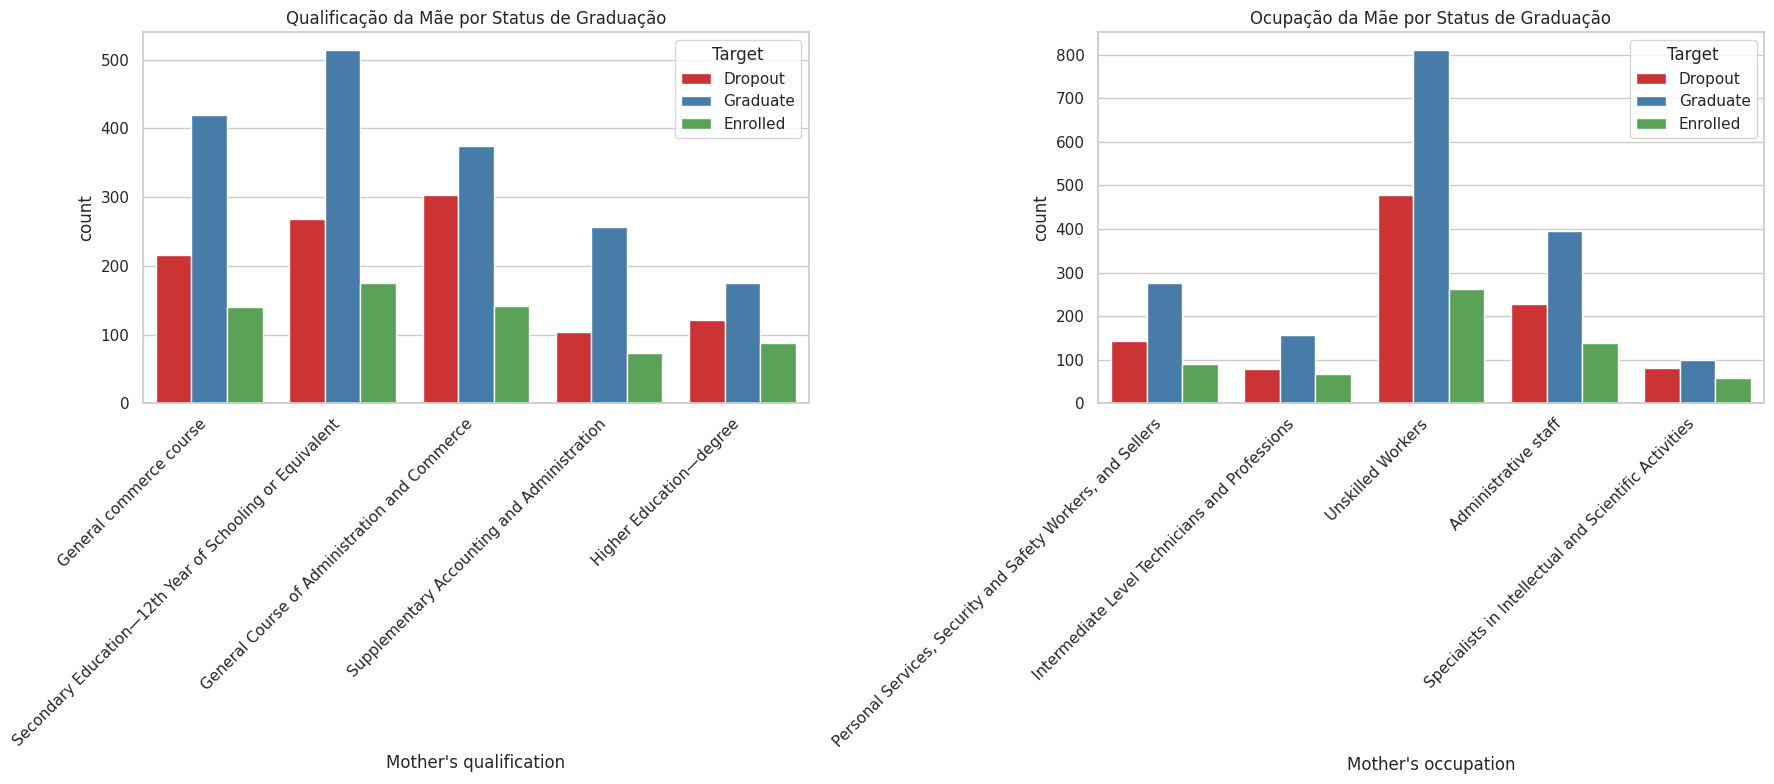

In [106]:
# Escolher apenas as 5 classificações mais frequentes para as variáveis de ocupação e qualificação
top_mother_occupations = df["Mother's occupation"].value_counts().nlargest(5).index
top_mother_qualifications = df["Mother's qualification"].value_counts().nlargest(5).index

# Filtrar o DataFrame apenas para incluir as classificações mais frequentes
df_mother_filtered = df[df["Mother's occupation"].isin(top_mother_occupations) & df["Mother's qualification"].isin(top_mother_qualifications)].copy()

# Mapear os códigos para rótulos nas variáveis categóricas
df_mother_filtered.loc[:, "Mother's occupation"] = df_mother_filtered["Mother's occupation"].map(occupation_mapping)
df_mother_filtered.loc[:, "Mother's qualification"] = df_mother_filtered["Mother's qualification"].map(qualification_mapping)

# Configurar a aparência dos gráficos
plt.figure(figsize=(18, 8))

# Gráfico de Qualificação da Mãe por Target
plt.subplot(1, 2, 1)
sns.countplot(x="Mother's qualification", data=df_mother_filtered, hue='Target', palette='Set1')
plt.title("Qualificação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

# Gráfico de Ocupação da Mãe por Target
plt.subplot(1, 2, 2)
sns.countplot(x="Mother's occupation", data=df_mother_filtered, hue='Target', palette='Set1')
plt.title("Ocupação da Mãe por Status de Graduação")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [107]:
# Função para imprimir estatísticas descritivas e contagens para variáveis categóricas
def print_categorical_stats(feature, df):
    print(f"\nEstatísticas para {feature}:")
    if feature in df.columns:
        if feature == 'Ocupation' or feature == "Mother's occupation" or feature == "Father's occupation":
            mapping = occupation_mapping
        elif feature == "Mother's qualification" or feature == "Father's qualification":
            mapping = qualification_mapping
        elif feature == 'Gender':
            mapping = gender_mapping
        elif feature == 'Marital status':
            mapping = marital_status_mapping
        else:
            mapping = None

        if mapping:
            # Substituir códigos pelos rótulos correspondentes
            df_display = df.replace({feature: mapping})

            # Contagem de categorias
            print(df_display[feature].value_counts())

            # Estatísticas descritivas
            print("\nEstatísticas Descritivas:")
            print(df_display.groupby('Target')[feature].describe())
        else:
            print(f"Mapeador não encontrado para a variável {feature}.")
    else:
        print(f"A coluna {feature} não está presente no DataFrame.")

In [108]:
# Lista de variáveis categóricas
categorical_variables = ['Marital status', 'Gender', 'Qualification', 'Ocupation',
                          "Mother's qualification", "Father's qualification",
                          "Mother's occupation", "Father's occupation"]

# Imprimir estatísticas para variáveis categóricas
for feature in categorical_variables:
    print_categorical_stats(feature, df)


Estatísticas para Marital status:
Marital status
Single               3919
Married               379
Divorced               91
Facto union            25
Legally separated       6
Widower                 4
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      6  Single  1184
Enrolled   794      6  Single   720
Graduate  2209      6  Single  2015

Estatísticas para Gender:
Gender
Female    2868
Male      1556
Name: count, dtype: int64

Estatísticas Descritivas:
         count unique     top  freq
Target                             
Dropout   1421      2  Female   720
Enrolled   794      2  Female   487
Graduate  2209      2  Female  1661

Estatísticas para Qualification:
A coluna Qualification não está presente no DataFrame.

Estatísticas para Ocupation:
A coluna Ocupation não está presente no DataFrame.

Estatísticas para Mother's qualification:
Mother's qualification
Secondary Education—12th Yea

In [109]:
# Lista de variáveis numéricas
numeric_variables = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Unemployment rate', 'GDP',
                     'Curricular units 2nd sem (grade)']

# Imprimir estatísticas para variáveis numéricas
for feature in numeric_variables:
    print(f"\nEstatísticas para {feature}:")
    print(df.groupby('Target')[feature].describe())
    print("\n")



Estatísticas para Age at enrollment:
           count       mean       std   min   25%   50%   75%   max
Target                                                             
Dropout   1421.0  26.068966  8.704024  18.0  19.0  23.0  30.0  70.0
Enrolled   794.0  22.369018  6.302672  17.0  19.0  20.0  23.0  54.0
Graduate  2209.0  21.783612  6.693218  17.0  18.0  19.0  21.0  62.0



Estatísticas para Curricular units 1st sem (grade):
           count       mean       std  min        25%        50%        75%  \
Target                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Target            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  



Estatísticas para Unemployment rate:
           count       mean       st

## Análise de Resultados

#### Estatísticas para Marital Status:

A coluna Marital Status possui seis categorias distintas, representadas por 'Single', 'Married', 'Divorced', 'Facto union', 'Legally separated' e 'Widower'. A contagem de cada categoria é a seguinte:

- Single: 3919
- Married: 379
- Divorced: 91
- Facto union: 25
- Legally separated: 6
- Widower: 4

Ao analisar as estatísticas descritivas, observa-se que a categoria mais frequente para cada grupo-alvo ('Dropout', 'Enrolled' e 'Graduate') é 'Single'. Por exemplo, para os graduados ('Graduate'), 2015 dos 2209 indivíduos são solteiros.

#### Estatísticas para Gênero (Gender):

A coluna Gender possui duas categorias: 'Female' e 'Male'. A contagem de cada categoria é a seguinte:

- Female: 2868
- Male: 1556

Ao observar as estatísticas descritivas, nota-se que a categoria mais comum para cada grupo-alvo é 'Female'. Por exemplo, dos 1421 indivíduos classificados como 'Dropout', 720 são do gênero feminino.

#### Estatísticas para Qualificação (Qualification):

A coluna Qualificação não está presente no DataFrame fornecido.

#### Estatísticas para Ocupação (Occupation):

A coluna Ocupação não está presente no DataFrame fornecido.

#### Estatísticas para Qualificação da Mãe (Mother's Qualification):

A coluna Qualificação da Mãe apresenta uma variedade de categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Secondary Education—12th Year of Schooling or Equivalent: 1069
2. General Course of Administration and Commerce: 1009
3. General Commerce Course: 953
4. Supplementary Accounting and Administration: 562
5. Higher Education—degree: 438

Observando as estatísticas descritivas, podemos verificar que a categoria 'General Course of Administration and Commerce' é a mais frequente para os alunos que desistiram ('Dropout').

#### Estatísticas para Qualificação do Pai (Father's Qualification):

A coluna Qualificação do Pai também apresenta várias categorias representando diferentes níveis de educação e formação. As cinco categorias mais frequentes são:

1. Basic Education 1st Cycle (4th/5th Year) or Equivalent: 1209
2. Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent: 968
3. Secondary Education—12th Year of Schooling or Equivalent: 904
4. Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent: 702
5. Higher Education—degree: 282

As estatísticas descritivas indicam que 'Basic Education 1st Cycle' é a categoria mais frequente para os alunos que desistiram ('Dropout').

#### Estatísticas para Ocupação da Mãe (Mother's Occupation):

A coluna Ocupação da Mãe possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1577
2. Administrative Staff: 817
3. Personal Services, Security and Safety Workers, and Sellers: 530
4. Intermediate Level Technicians and Professions: 351
5. Specialists in Intellectual and Scientific Activities: 318

Ao analisar as estatísticas descritivas, observamos que a categoria 'Unskilled Workers' é a mais frequente para os alunos que desistiram ('Dropout').

#### Estatísticas para Ocupação do Pai (Father's Occupation):

A coluna Ocupação do Pai também possui diversas categorias representando diferentes ocupações. As cinco categorias mais frequentes são:

1. Unskilled Workers: 1010
2. Skilled Workers in Industry, Construction, and Craftsmen: 666
3. Personal Services, Security and Safety Workers, and Sellers: 516
4. Administrative Staff: 386
5. Intermediate Level Technicians and Professions: 384

As estatísticas descritivas indicam que 'Unskilled Workers' é a categoria mais frequente para os alunos que desistiram ('Dropout').

#### Estatísticas para Idade na Matrícula (Age at Enrollment):

A coluna Idade na Matrícula fornece estatísticas sobre a idade dos alunos no momento da matrícula. As estatísticas descritivas mostram média, desvio padrão, mínimo, máximo e quartis para cada grupo-alvo.

#### Estat

ísticas para Desempenho na 1ª Semestre (Curricular Units 1st Sem Grade):

A coluna Desempenho na 1ª Semestre indica as notas das unidades curriculares no primeiro semestre. As estatísticas descritivas apresentam média, desvio padrão, mínimo, máximo e quartis para cada grupo-alvo.

#### Estatísticas para Taxa de Desemprego (Unemployment Rate):

A coluna Taxa de Desemprego fornece estatísticas sobre a taxa de desemprego dos alunos. As estatísticas descritivas mostram média, desvio padrão, mínimo, máximo e quartis para cada grupo-alvo.

#### Estatísticas para PIB (GDP):

A coluna PIB fornece estatísticas sobre o Produto Interno Bruto dos alunos. As estatísticas descritivas mostram média, desvio padrão, mínimo, máximo e quartis para cada grupo-alvo.

#### Estatísticas para Desempenho na 2ª Semestre (Curricular Units 2nd Sem Grade):

A coluna Desempenho na 2ª Semestre indica as notas das unidades curriculares no segundo semestre. As estatísticas descritivas apresentam média, desvio padrão, mínimo, máximo e quartis para cada grupo-alvo.

## 3. Data preparation (Preparação dos dados)

## 4. Modeling (Modelagem)

1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

## 5. Evaluation (Validação)
